In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, permutation_test_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/tqlong/miniconda3/envs/machine-learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
iris = datasets.load_iris()
X, y = iris['data'], iris['target']
target_names = iris['target_names']
feature_names = iris['feature_names']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

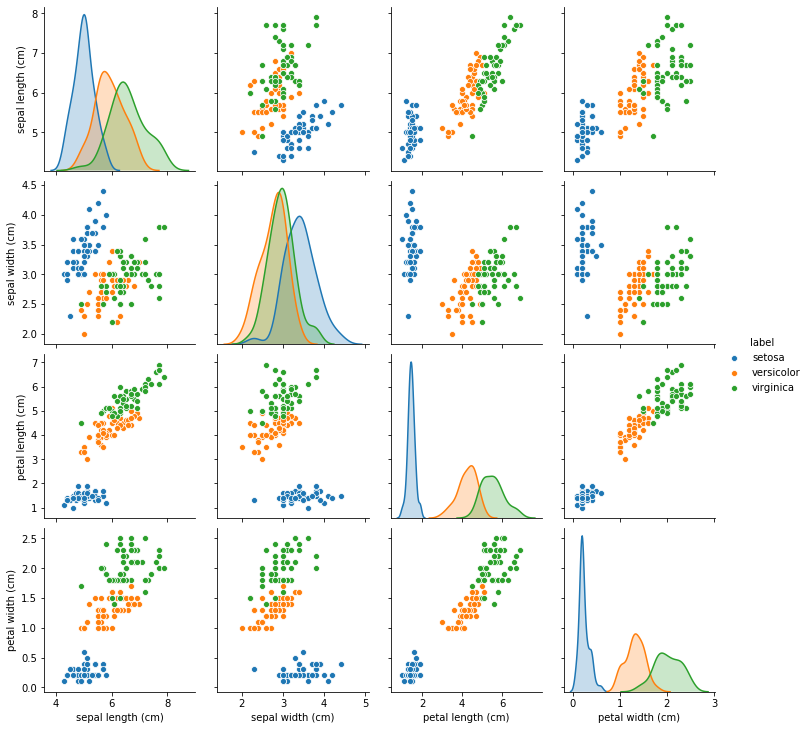

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df['label'] = target_names[y]
sns.pairplot(df, hue='label');

In [4]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [5]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [6]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [7]:
accuracy = (y_pred==y_test).sum() / len(y_test)
print(f"Accuracy {accuracy*100:.2f}%")

Accuracy 96.00%


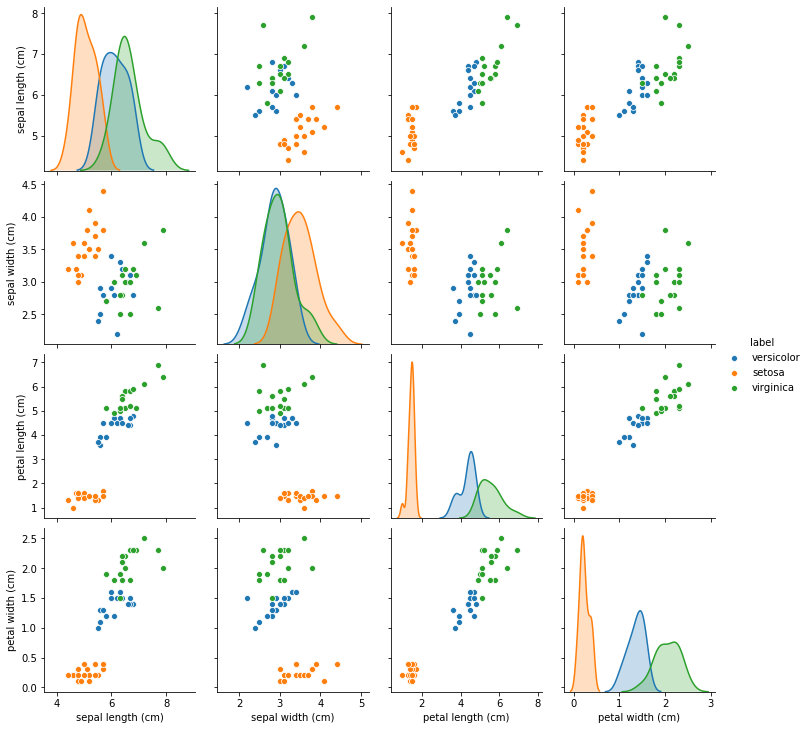

In [8]:
df_test = pd.DataFrame(X_test, columns=feature_names)
df_test['label'] = target_names[y_test]
df_test['predict'] = target_names[y_pred]
correct_labels = np.array(['incorrect', 'correct'])
df_test['correct'] = correct_labels[(y_pred==y_test).astype(np.int)]
sns.pairplot(df_test, hue='label');

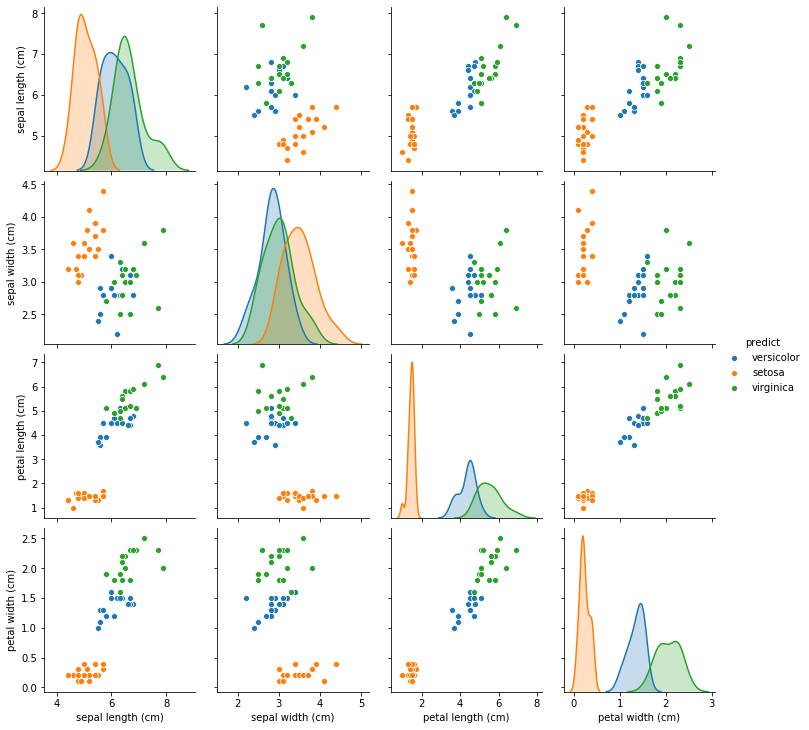

In [9]:
sns.pairplot(df_test, hue='predict');

/home/tqlong/miniconda3/envs/machine-learning/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


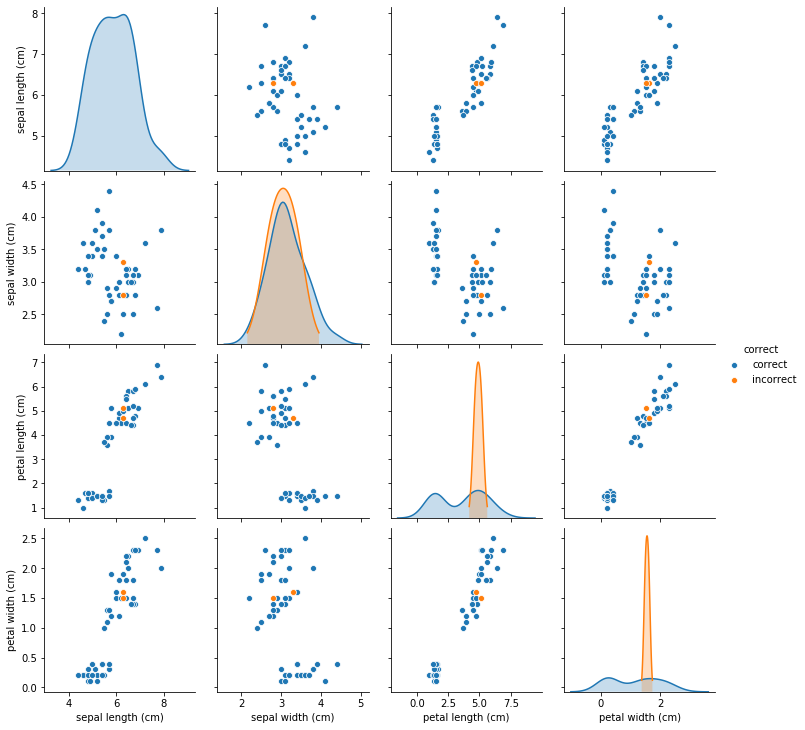

In [10]:
sns.pairplot(df_test, hue='correct');

In [11]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

# vectors_train = vectors_train / vectors_train.sum(axis=0)
# vectors_test = vectors_test / vectors_test.sum(axis=0)

In [13]:
vectors_train.shape, vectors_test.shape

((11314, 130107), (7532, 130107))

In [14]:
vectors_train.nnz / vectors_train.shape[0] / vectors_train.shape[1]

0.001214353154362896

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB(alpha=.01)
clf.fit(vectors_train, newsgroups_train.target)
pred = clf.predict(vectors_test)
f1 = metrics.f1_score(newsgroups_test.target, pred, average='macro')
acc = metrics.accuracy_score(newsgroups_test.target, pred)
print(f1, acc)

0.8290659644474043 0.8352363250132767


In [16]:
vectors_train.max()

0.9983138151469467